In [21]:
import torch
import config
from utils import (
    get_model_instance_segmentation,
    collate_fn,
    get_transform,
    myOwnDataset,
)
import model
import detect_utils
import cv2
import json
import matplotlib.pyplot as plt



In [23]:

print("Torch version:", torch.__version__)

# create own Dataset
training_dataset = myOwnDataset(
    root=config.data_dir, annotation=config.train_coco, transforms=get_transform()
)

# training DataLoader
training_loader = torch.utils.data.DataLoader(
    training_dataset,
    batch_size=config.train_batch_size,
    shuffle=config.train_shuffle_dl,
    num_workers=config.num_workers_dl,
    collate_fn=collate_fn,
)


# select device (whether GPU or CPU)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# DataLoader is iterable over Dataset
for imgs, annotations in training_loader:
    imgs = list(img.to(device) for img in imgs)
    annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
    print(annotations)


model = model.get_model(device = device, model_name='v2')


# parameters
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params, lr=config.lr, momentum=config.momentum, weight_decay=config.weight_decay
)

len_dataloader = len(training_loader)


Torch version: 1.13.1+cpu
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
[{'boxes': tensor([[494.9300, 220.9100, 529.7900, 252.9000],
        [465.3300, 256.7200, 553.1800, 292.0500]]), 'labels': tensor([1, 1]), 'image_id': tensor([226]), 'area': tensor([1115.1714, 3103.7405]), 'iscrowd': tensor([0, 0])}]
[{'boxes': tensor([[570.5500, 512.1000, 740.3400, 592.8900],
        [623.9000, 409.9200, 728.5700, 469.3300]]), 'labels': tensor([1, 1]), 'image_id': tensor([199]), 'area': tensor([13717.3340,  6218.4448]), 'iscrowd': tensor([0, 0])}]
[{'boxes': tensor([[142.0300, 301.1500, 299.2500, 421.7100],
        [187.0800, 226.5200, 251.5600, 253.4600]]), 'labels': tensor([1, 1]), 'image_id': tensor([865]), 'area': tensor([18954.4434,  1737.0912]), 'iscrowd': tensor([0, 0])}]
[{'boxes': tensor([]), 'labels': tensor([], dtype=torch.int64), 'image_id': tensor([1223]), 'area': tensor([]), 'iscrowd': tensor([], dtype=torch.int64)}]
[{'boxes': tensor([[ 313.9200,

In [19]:

# Training
for epoch in range(config.num_epochs):
    print(f"Epoch: {epoch}/{config.num_epochs}")
    model.train()
    i = 0
    
    for imgs, annotations in training_loader:
        i += 1
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        print("imgs:", imgs)
        print("num: ")
        print(annotations[0]['boxes'].size() == torch.Size([0]))
        
        #if the annotations are emptpy, skip
        if annotations[0]['boxes'].size() == torch.Size([0]):
            continue
        
        print("annotations:", annotations)
        # pass if there are no annotations
        # if len(annotations) == 0:
        #     continue
        # if 
        loss_dict = model(imgs, annotations)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        print(f"Iteration: {i}/{len_dataloader}, Loss: {losses}")

Epoch: 0/10
imgs: [tensor([[[0.1961, 0.1961, 0.1961,  ..., 0.1765, 0.1765, 0.1765],
         [0.1961, 0.1961, 0.1961,  ..., 0.1765, 0.1765, 0.1765],
         [0.1882, 0.1882, 0.1882,  ..., 0.1725, 0.1725, 0.1725],
         ...,
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3020, 0.3020],
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3020, 0.3020],
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3020, 0.3020]],

        [[0.2745, 0.2745, 0.2745,  ..., 0.2824, 0.2824, 0.2824],
         [0.2745, 0.2745, 0.2745,  ..., 0.2824, 0.2824, 0.2824],
         [0.2784, 0.2784, 0.2784,  ..., 0.2863, 0.2863, 0.2863],
         ...,
         [0.3843, 0.3843, 0.3843,  ..., 0.3843, 0.3843, 0.3843],
         [0.3843, 0.3843, 0.3843,  ..., 0.3843, 0.3843, 0.3843],
         [0.3843, 0.3843, 0.3843,  ..., 0.3843, 0.3843, 0.3843]],

        [[0.3098, 0.3098, 0.3098,  ..., 0.3490, 0.3490, 0.3490],
         [0.3098, 0.3098, 0.3098,  ..., 0.3490, 0.3490, 0.3490],
         [0.3098, 0.3098, 0.3098,  ...,

KeyboardInterrupt: 

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
len
1
1
____


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 - 
[[ 55  35 958 713]]
 - 
['Pretec']
 - 
tensor([1])


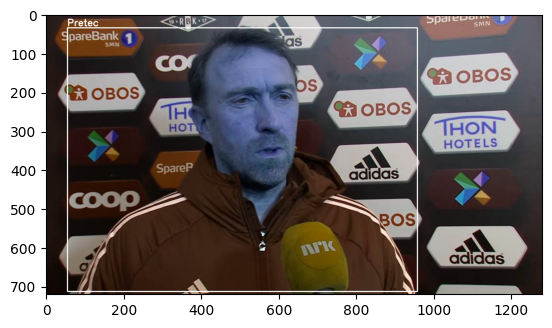

len
1
1
____


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 - 
[[615  88 871 710]]
 - 
['Pretec']
 - 
tensor([1])


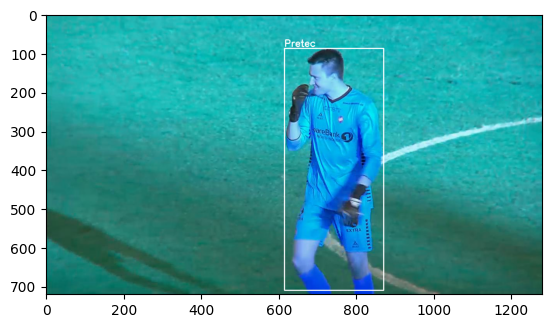

len
1
1
____


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 - 
[[   4    0  561  715]
 [ 677    1 1196  718]]
 - 
['Pretec', 'Pretec']
 - 
tensor([1, 1])


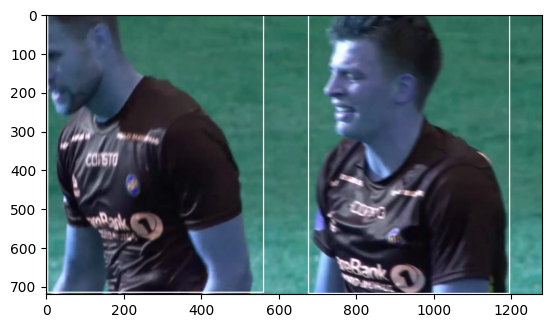

len
1
1
____


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 - 
[[ 520  107  855  712]
 [ 801   97 1134  713]
 [ 132   70  531  712]
 [   3  333  278  712]
 [ 656  113  900  440]]
 - 
['Pretec', 'Pretec', 'Pretec', 'Pretec', 'Pretec']
 - 
tensor([1, 1, 1, 1, 1])


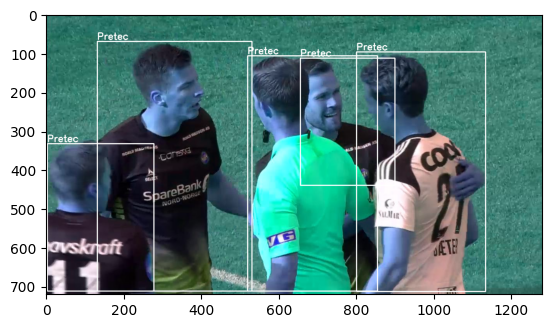

len
1
1
____
 - 
[]
 - 
[]
 - 
tensor([], dtype=torch.int64)


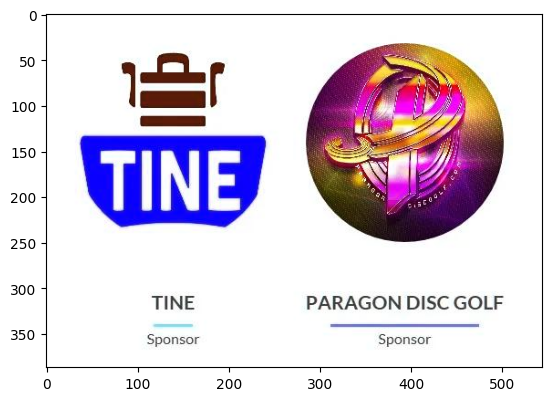

len
1
1
____


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 - 
[[129  31 633 714]]
 - 
['Pretec']
 - 
tensor([1])


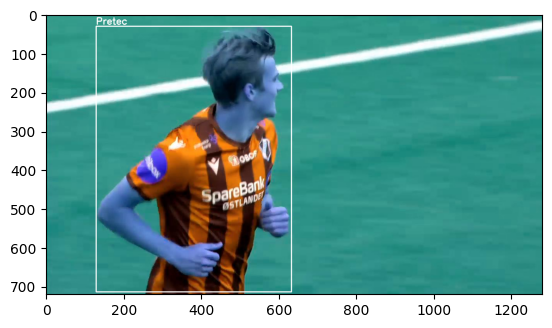

len
1
1
____


KeyboardInterrupt: 

In [24]:

num_correct = 0
total = 0
# create test Dataset
testing_dataset = myOwnDataset(
    root=config.data_dir, annotation=config.test_coco, transforms=get_transform()
)
#testing DataLoader
testing_loader = torch.utils.data.DataLoader(
    testing_dataset,
    batch_size=config.test_batch_size,
    shuffle=config.train_shuffle_dl,
    num_workers=config.num_workers_dl,
    collate_fn=collate_fn,
)

#load json file

with open(config.test_coco) as f:
    json_data = json.load(f)


model.eval()
with torch.no_grad():
    
    for imgs, annotations in testing_loader:
        print("len")
        print(len(imgs))
        print(len(annotations))
        print("____")

        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        # if annotations[0]['boxes'].size() == torch.Size([0]):
        #     continue
        # boxes, classes, labels = detect_utils.predict(image, model, device, 0.8)

        # image = detect_utils.draw_boxes(boxes, classes, labels, image)

        # i = 0
        
        for image in imgs:
            # annotaion = annotations[i]
            # i += 1

            # image = image.transpose(0, 1)
            image = image.transpose(0, 2)
            # puts the color in the right place but the image must be rotated 90 degrees
            image = image.transpose(0, 1)

            image = image.numpy()

            boxes, pred_classes, labels = detect_utils.predict(image, model, device, 0.8)

            # print(annotaion)
            print(" - ")
            print(boxes)
            print(" - ")
            print(pred_classes)
            print(" - ")
            print(labels)

            image = detect_utils.draw_boxes(boxes, pred_classes, labels, image)
            
            plt.imshow(image) 
            plt.show()


        
        # cv2.waitKey(0)
            
        # predictions = model(data)
        # num_correct += (predictions == labels).sum()
        # total += labels.size(0)

    # print(f"Test Accuracy of the model: {float(num_correct)/float(total)*100:.2f}")